_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [1]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



## Code

In [17]:
#imports
from fbprophet import Prophet
%matplotlib inline

### wrangle

In [6]:
avocado.columns = ['ds','y']

In [8]:
avocado.head()

,ds,y
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


### model

In [9]:
model = Prophet()

In [10]:
model.fit(avocado)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [13]:
future = model.make_future_dataframe(periods=100,freq='W')

In [14]:
preds = model.predict(future)

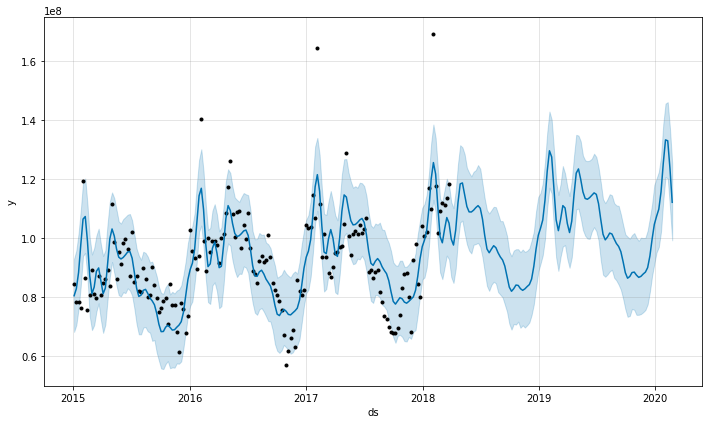

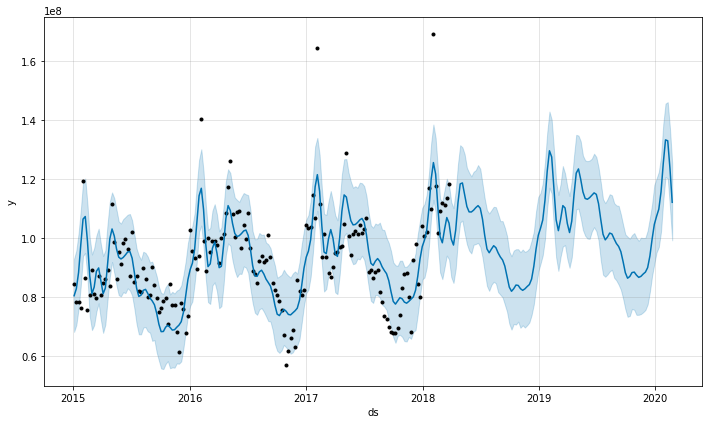

In [21]:
model.plot(preds)

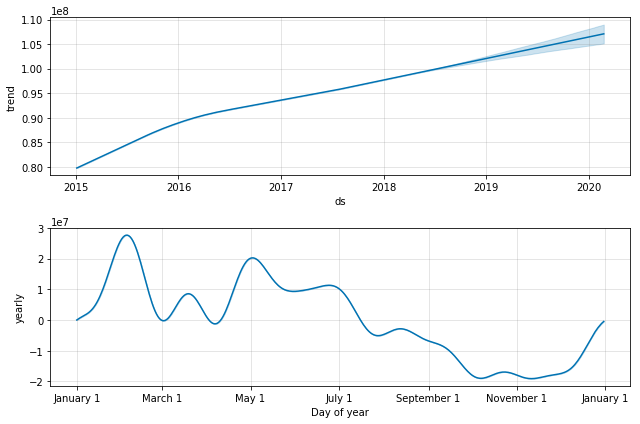

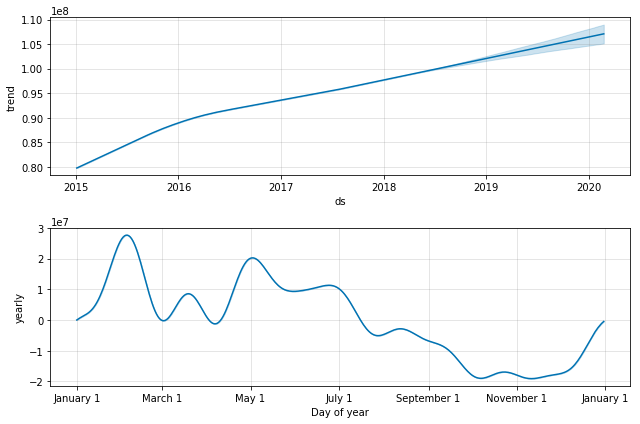

In [20]:
model.plot_components(preds)

### cross val
horizon='90 days', period='45 days', initial='730 days'

In [34]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric


In [25]:
cv = cross_validation(model,horizon='90 days', period='45 days', initial='730 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00
/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/usr/local/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `n

In [38]:
cv_mape = performance_metrics(cv)

In [42]:
cv_mape.head()

,horizon,mse,rmse,mae,mape,coverage
0,9 days,1.160951e+14,1.077475e+07,9.057276e+06,0.102888,0.5
1,10 days,1.156367e+14,1.075345e+07,8.960854e+06,0.101672,0.5
2,11 days,8.989209e+13,9.481144e+06,7.981286e+06,0.088973,0.6
3,12 days,9.502117e+13,9.747880e+06,8.666280e+06,0.099210,0.6
4,13 days,9.555187e+13,9.775064e+06,8.875647e+06,0.097985,0.6


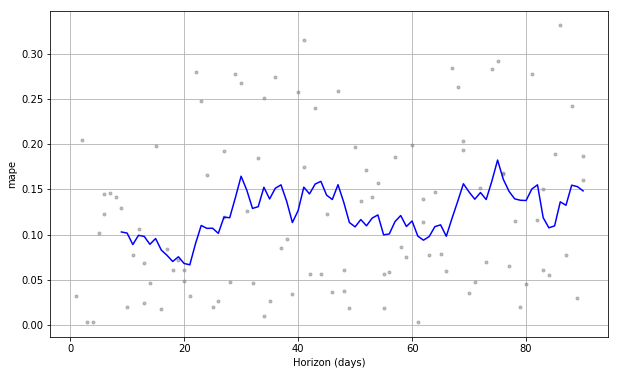

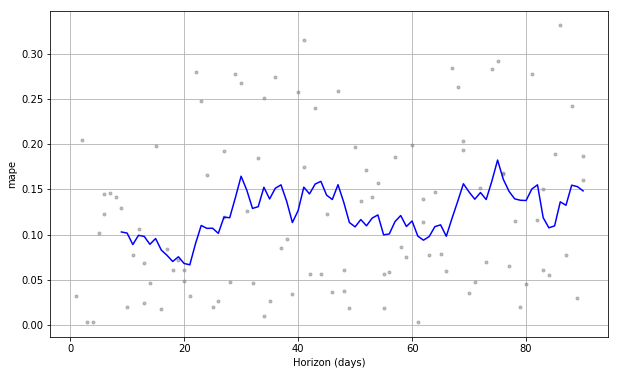

In [43]:
plot_cross_validation_metric(cv,metric='mape')

### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [44]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [122]:
#imports
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

### baselines

In [46]:
rent['mean_baseline'] = rent['price'].mean()

In [49]:
rent['naive_baseline'] = rent['price'].shift(1).bfill()

In [50]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,mean_baseline,naive_baseline
0,2016,6,3,1.5,40.7145,-73.9425,3000,3438.052034,3000.0
1,2016,6,2,1.0,40.7947,-73.9667,5465,3438.052034,3000.0
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034,5465.0
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034,2850.0
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034,3275.0


### errors

In [52]:
# mean baseline error
mean_absolute_error(rent['price'],rent['mean_baseline'])

1055.7857771080928

In [53]:
# naive baseline error
mean_absolute_error(rent['price'],rent['naive_baseline'])

1481.7916968630293

In [57]:
# mean r2 score
r2_score(rent['price'],rent['mean_baseline'])

0.0

In [58]:
# naive r2 score
r2_score(rent['price'],rent['naive_baseline'])

-1.0051330078866116

### train/test split
Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.

In [62]:
train = rent.loc[(rent['month'] == 4) | (rent['month'] == 5)]

In [66]:
test = rent.loc[~rent['month'].isin(train['month'])]

### model

Let's look at bedrooms and bathrooms

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
m = LinearRegression()

In [71]:
features = ['bedrooms','bathrooms']
target = 'price'

In [73]:
X = train[features]
y = train[target]

In [76]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
preds = m.predict(test[features])

### accuracy
Get regression metrics MAE and  𝑅2  for the test data.

In [81]:
mean_absolute_error(test['price'],preds)

754.0733041489015

In [83]:
r2_score(test['price'],preds)

0.4613584851907725

### model coefficients 

In [84]:
m.coef_

array([ 420.5097168 , 1531.76264753])

In [85]:
m.intercept_

994.3062975058097

## Generalized Model Prediction

In [193]:
from itertools import combinations 
import seaborn as sns

In [183]:
feature_cols = ['bedrooms', 'bathrooms', 'latitude', 'longitude']

In [263]:
def _get_split(df:pd.DataFrame, features:list, target:str):
    '''
    Splits data into training and test data. Train data contains months 4 and 5
    
    Returns: X_train, y_train, X_test, y_test
    '''
    train = df.loc[(df['month'] == 4) | (df['month'] == 5)]
    test = df.loc[~df['month'].isin(train['month'])]
    X_train = train[features]
    y_train = train[target]
    
    X_test = test[features]
    y_test = test[target]
    
    return X_train, y_train, X_test, y_test

In [265]:
def predict_rent_errors(df, features:list, target='price', test_data=True):
    '''
    Predict the rent price based on a feature list and target of price. To test training data,
    set test_data=False
    
    Returns mae, r2, and rmse errors
    '''
    X_train, y_train, X_test, y_test = _get_split(df,features,target)
    m = LinearRegression()
    m.fit(X_train,y_train)
    
    if test_data:
        preds = m.predict(X_test)
        mae = mean_absolute_error(y_test,preds)
        r2 = r2_score(y_test,preds)
        rmse = mean_squared_error(y_test,preds)
    else:
        preds = m.predict(X_train)
        mae = mean_absolute_error(y_train,preds)
        r2 = r2_score(y_train,preds)
        rmse = mean_squared_error(y_train,preds) 
    return mae,r2,rmse

In [266]:
def build_df(features, test_data=True):
    '''
    Wrangles errors based on list of features. 
    
    Returns df
    '''
    
    df = pd.DataFrame(columns=['feature','mae', 'r2', 'rmse'])
    mae, r2, rmse = [],[],[]
    for feature in features:
        errors = predict_rent_errors(rent,list(feature),test_data=test_data)
        df = df.append({'feature':feature,'mae':errors[0],'r2':errors[1],'rmse':errors[2]},ignore_index=True)
    
    return df

## Feature Comparison

In [267]:
two_feature = list(combinations(set(feature_cols),2))

In [268]:
three_features = list(combinations(set(feature_cols),3))

In [269]:
four_features = list(combinations(set(feature_cols),4))

### Two Feature Comparison 

#### test data

In [274]:
build_df(two_feature)

,feature,mae,r2,rmse
0,"(bedrooms, bathrooms)",754.073304,0.461358,1.064678e+06
1,"(bedrooms, latitude)",857.719139,0.298459,1.386665e+06
2,"(bedrooms, longitude)",767.873839,0.409459,1.167262e+06
3,"(bathrooms, latitude)",820.273184,0.392550,1.200686e+06
4,"(bathrooms, longitude)",751.357650,0.477604,1.032568e+06
5,"(latitude, longitude)",989.137694,0.098563,1.781778e+06


#### train data

In [275]:
build_df(two_feature,test_data=False)

,feature,mae,r2,rmse
0,"(bedrooms, bathrooms)",737.417898,0.482046,1.012768e+06
1,"(bedrooms, latitude)",834.972514,0.327611,1.314738e+06
2,"(bedrooms, longitude)",749.792127,0.439009,1.096919e+06
3,"(bathrooms, latitude)",807.395441,0.408317,1.156932e+06
4,"(bathrooms, longitude)",741.384181,0.493408,9.905503e+05
5,"(latitude, longitude)",993.644163,0.101077,1.757684e+06


### Three Feature Comparison

#### test data

In [271]:
build_df(three_features)

,feature,mae,r2,rmse
0,"(bedrooms, bathrooms, latitude)",746.723523,0.464997,1.057485e+06
1,"(bedrooms, bathrooms, longitude)",666.809724,0.561965,8.658187e+05
2,"(bedrooms, latitude, longitude)",768.482538,0.412097,1.162048e+06
3,"(bathrooms, latitude, longitude)",752.032355,0.478700,1.030401e+06


#### train data

In [276]:
build_df(three_features, test_data=False)

,feature,mae,r2,rmse
0,"(bedrooms, bathrooms, latitude)",727.490394,0.487815,1.001488e+06
1,"(bedrooms, bathrooms, longitude)",650.058925,0.585135,8.111943e+05
2,"(bedrooms, latitude, longitude)",751.098551,0.440348,1.094300e+06
3,"(bathrooms, latitude, longitude)",742.069215,0.493910,9.895691e+05


### Four Feature Comparison

#### test data

In [272]:
build_df(four_features)

,feature,mae,r2,rmse
0,"(bedrooms, bathrooms, latitude, longitude)",667.654309,0.563795,862202.429573


#### train data

In [277]:
build_df(four_features,test_data=False)

,feature,mae,r2,rmse
0,"(bedrooms, bathrooms, latitude, longitude)",651.304573,0.586064,809378.330166
